In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'PE&OLES.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,251.309998,234.550003,234.550003,249.559998,287708.0,240.693558
2019-03-21,255.000000,246.389999,249.100006,253.589996,216214.0,244.580383
2019-03-22,253.899994,240.050003,253.899994,244.899994,186102.0,236.199112
2019-03-25,250.000000,242.830002,245.000000,249.490005,92684.0,240.626053
2019-03-26,250.039993,242.050003,248.770004,242.529999,191008.0,233.913330


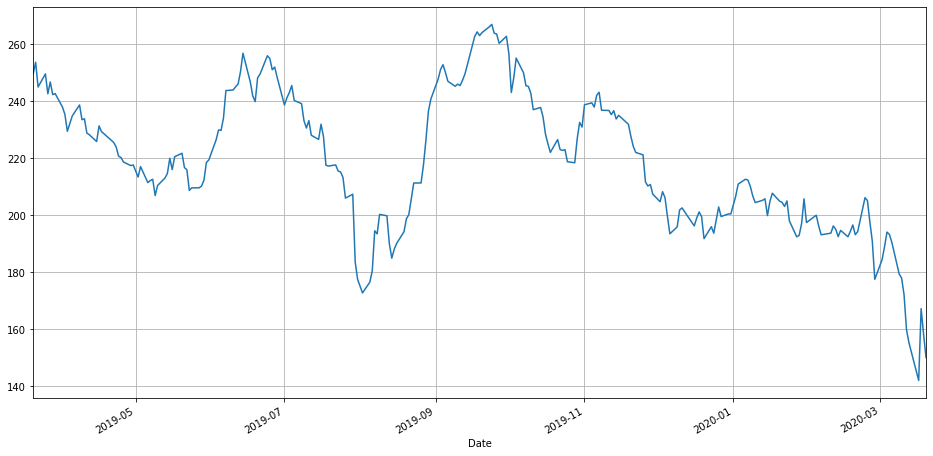

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

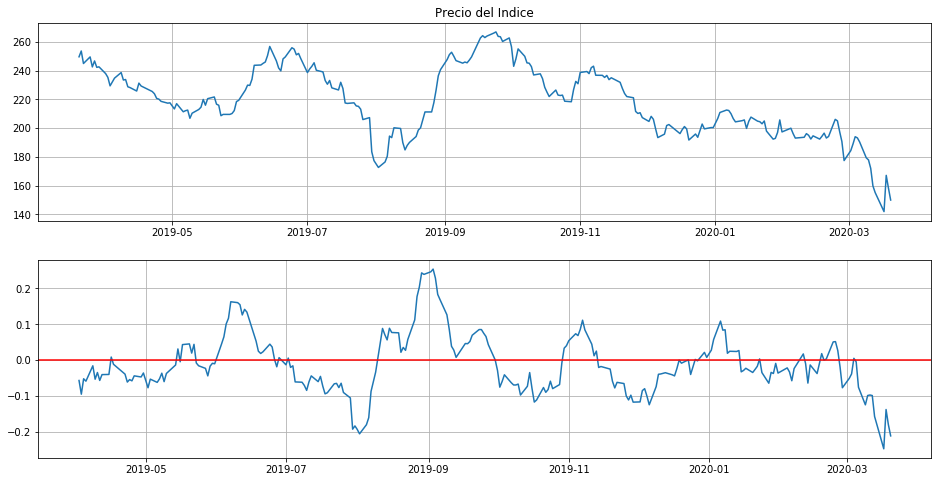

,Close,ROC_10,Recomendación
Date,,,
2019-04-16,231.259995,0.008284,Se recomienda COMPRAR la acción.
2019-04-17,229.259995,-0.012023,Se recomienda VENDER la acción.
2019-05-15,219.910004,0.030941,Se recomienda COMPRAR la acción.
2019-05-16,215.919998,-0.004931,Se recomienda VENDER la acción.
2019-05-17,220.460007,0.043104,Se recomienda COMPRAR la acción.
2019-05-23,208.619995,-0.008272,Se recomienda VENDER la acción.
2019-06-03,226.399994,0.045100,Se recomienda COMPRAR la acción.
2019-06-27,251.880005,-0.018968,Se recomienda VENDER la acción. (DIV)
2019-06-28,248.300003,0.006649,Se recomienda COMPRAR la acción. (DIV)


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]